This project imports the final prepared adult dataset(both train and test) and stored as xgboost binary DMatrix format.

In [1]:
import xgboost as xgb

To load  a XGBoost binary file into DMatrix:

In [2]:
dtrain = xgb.DMatrix('prepared_train_data_in_Dformat_binary_format.buffer')

dtest = xgb.DMatrix('prepared_test_data_in_Dformat_binary_format.buffer')

[23:12:33] 30162x14 matrix with 422268 entries loaded from prepared_train_data_in_Dformat_binary_format.buffer
[23:12:33] 15060x14 matrix with 210840 entries loaded from prepared_test_data_in_Dformat_binary_format.buffer


XGBoost can use either a list of pairs or a dictionary to set parameters. For instance:

In [3]:

param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic','nthread': 4,
        'eval_metric':['aucpr','auc']}

progress = dict()

In [4]:
bst = xgb.train(param, dtrain, num_boost_round=2000, evals = [(dtest, 'eval'), (dtrain, 'train')],
               early_stopping_rounds=5, verbose_eval=10,evals_result=progress)

[0]	eval-aucpr:0.924265	eval-auc:0.831881	train-aucpr:0.921908	train-auc:0.830906
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 5 rounds.
[10]	eval-aucpr:0.96737	eval-auc:0.90791	train-aucpr:0.967503	train-auc:0.910559
[20]	eval-aucpr:0.97015	eval-auc:0.915267	train-aucpr:0.971087	train-auc:0.919788
[30]	eval-aucpr:0.971896	eval-auc:0.919819	train-aucpr:0.972849	train-auc:0.924371
[40]	eval-aucpr:0.972914	eval-auc:0.922656	train-aucpr:0.97434	train-auc:0.927862
[50]	eval-aucpr:0.973121	eval-auc:0.923442	train-aucpr:0.975114	train-auc:0.929769
[60]	eval-aucpr:0.973291	eval-auc:0.923789	train-aucpr:0.975515	train-auc:0.930848
[70]	eval-aucpr:0.973434	eval-auc:0.924213	train-aucpr:0.975947	train-auc:0.932036
[80]	eval-aucpr:0.973446	eval-auc:0.924623	train-aucpr:0.976438	train-auc:0.933145
[90]	eval-aucpr:0.973381	eval-auc:0.924276	train-aucpr:0.97686	train-auc:0.934154
[100]	eval-aucpr:0.973579	eval-auc

In [5]:

progress

{'eval': {'aucpr': [0.924265,
   0.946439,
   0.95711,
   0.960925,
   0.963674,
   0.964823,
   0.965659,
   0.96618,
   0.966826,
   0.967159,
   0.96737,
   0.967451,
   0.968088,
   0.968334,
   0.969054,
   0.969187,
   0.969334,
   0.969343,
   0.969437,
   0.969895,
   0.97015,
   0.970334,
   0.970968,
   0.971252,
   0.971952,
   0.972006,
   0.971923,
   0.971829,
   0.971876,
   0.971875,
   0.971896,
   0.972223,
   0.972189,
   0.972213,
   0.972103,
   0.972079,
   0.972185,
   0.972247,
   0.972362,
   0.972513,
   0.972914,
   0.973103,
   0.973076,
   0.973044,
   0.973014,
   0.973128,
   0.973096,
   0.973133,
   0.973124,
   0.973184,
   0.973121,
   0.973282,
   0.973223,
   0.973259,
   0.973248,
   0.973197,
   0.973174,
   0.973183,
   0.973261,
   0.973259,
   0.973291,
   0.97336,
   0.973417,
   0.973449,
   0.973475,
   0.973564,
   0.973545,
   0.973568,
   0.973526,
   0.973448,
   0.973434,
   0.973412,
   0.973415,
   0.973532,
   0.973413,
   0.97346,
 

### Plotting
You can use plotting module to plot importance and output tree.

To plot importance, use xgboost.plot_importance(). This function requires matplotlib to be installed.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plot
import graphviz

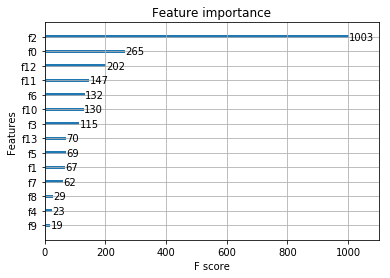

In [9]:
xgb.plot_importance(bst)

To plot the output tree via matplotlib, use xgboost.plot_tree(), specifying the ordinal number of the target tree. This function requires graphviz and matplotlib.

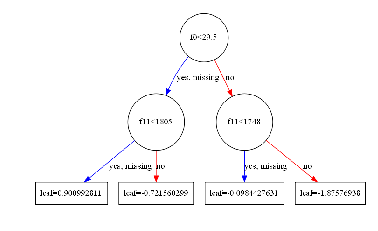

In [10]:
xgb.plot_tree(bst, num_trees=2)

When you use IPython, you can use the xgboost.to_graphviz() function, which converts the target tree to a graphviz instance. The graphviz instance is automatically rendered in IPython.

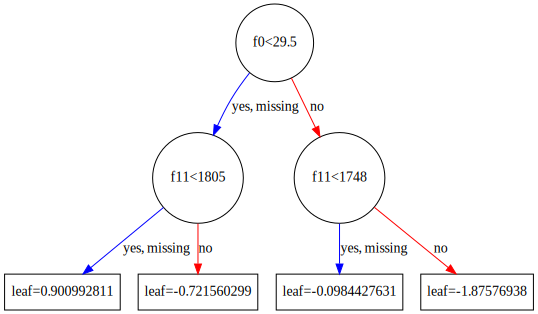

In [11]:
xgb.to_graphviz(bst, num_trees=2)

### Prediction
A model that has been trained or loaded can perform predictions on data sets.

If early stopping is enabled during training, you can get predictions from the best iteration with `bst.best_ntree_limit`:

In [12]:
ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)

In [13]:
ypred[0:5]

array([9.9963951e-01, 8.4669971e-01, 6.9528514e-01, 7.8533433e-04,
       9.9504185e-01], dtype=float32)